# Fenics methods for:
 - getting and manipulating mesh vertices:
   - mesh.coordinates()
 - getting degree of freedom (d.o.f.) node coordinates
   - V.tabulate_dof_locations()
 - getting mesh cells (1D: intervals, 2D: triangles, 3D: tetrahedra)
   - mesh.cells()

In [1]:
import numpy as np
from fenics import *
import matplotlib.pyplot as plt

### Get the coordinates of the vertices in a mesh with mesh.coordinates()

In [2]:
mesh = UnitSquareMesh(1,2)

vertex_coords = mesh.coordinates()

print('vertex_coords=\n', vertex_coords)

vertex_coords=
 [[0.  0. ]
 [1.  0. ]
 [0.  0.5]
 [1.  0.5]
 [0.  1. ]
 [1.  1. ]]


Text(0.5, 1.0, 'mesh. red stars are mesh vertices')

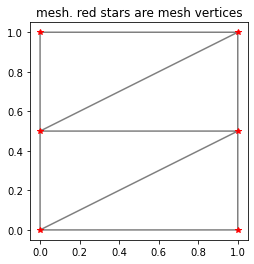

In [3]:
plot(mesh)
plt.plot(vertex_coords[:,0], vertex_coords[:,1], '*r')
plt.title('mesh. red stars are mesh vertices')

### Get finite element degree of freedom (d.o.f.) node coordinates with V.tabulate_dof_coordinates()

In [4]:
V = FunctionSpace(mesh, 'CG', 2) # <---- P2 (quadratic) elements

dof_coords = V.tabulate_dof_coordinates()

print('dof_coords=\n', dof_coords)

dof_coords=
 [[1.   0.75]
 [0.   0.5 ]
 [1.   0.5 ]
 [0.5  0.5 ]
 [1.   1.  ]
 [0.5  0.75]
 [0.   0.  ]
 [1.   0.  ]
 [1.   0.25]
 [0.5  0.25]
 [0.5  0.  ]
 [0.   0.25]
 [0.   1.  ]
 [0.5  1.  ]
 [0.   0.75]]


Text(0.5, 1.0, 'mesh. blue stars are d.o.f. nodes')

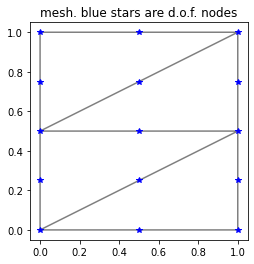

In [5]:
plot(mesh)
plt.plot(dof_coords[:,0], dof_coords[:,1], '*b')
plt.title('mesh. blue stars are d.o.f. nodes')

### Moving mesh vertices by modifying mesh.coordinates()

Text(0.5, 1.0, 'mesh after modification. blue stars are d.o.f. nodes')

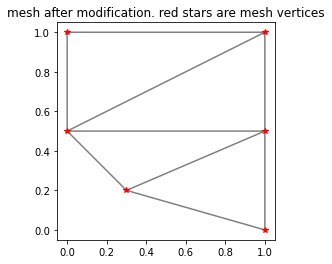

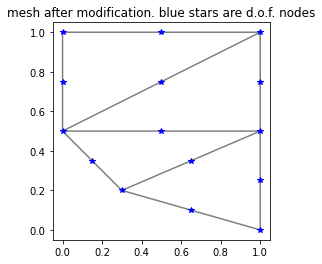

In [6]:
new_coords_for_first_vertex = np.array([0.3, 0.2])

mesh.coordinates()[0,:] = new_coords_for_first_vertex # <---- Move the first vertex to (0.3, 0.2)

plot(mesh)
plt.plot(vertex_coords[:,0], vertex_coords[:,1], '*r')
plt.title('mesh after modification. red stars are mesh vertices')

dof_coords = V.tabulate_dof_coordinates()
plt.figure()
plot(mesh)
plt.plot(dof_coords[:,0], dof_coords[:,1], '*b')
plt.title('mesh after modification. blue stars are d.o.f. nodes')

### Getting the vertex inds for each mesh cell (triangle) with mesh.cells()

In [7]:
mesh_cells = mesh.cells()
print('mesh_cells=\n', mesh_cells)

mesh_cells=
 [[0 1 3]
 [0 2 3]
 [2 3 5]
 [2 4 5]]


In [8]:
vertex_indices_for_first_cell = mesh_cells[0,:]
vertex_coords_for_first_cell = vertex_coords[vertex_indices_for_first_cell, :]

print('vertex_coords_for_first_cell=\n', vertex_coords_for_first_cell)

vertex_coords_for_first_cell=
 [[0.3 0.2]
 [1.  0. ]
 [1.  0.5]]


Text(0.5, 1.0, 'red stars are vertices for first cell')

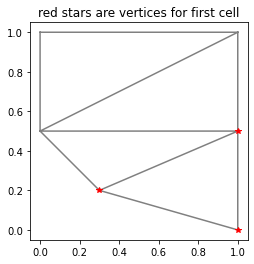

In [9]:
plot(mesh)
plt.plot(vertex_coords_for_first_cell[:,0], vertex_coords_for_first_cell[:,1], '*r')
plt.title('red stars are vertices for first cell')